In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
tf.__version__

'2.2.0'

## 1 Himmelblau 函数
$f(x,y)=(x^2+y-11)^2 +(x+y^2-7)^2 $
## 局部最小值 （3,2）（-2.8,3.1）（-3.78，3.28）（3.5,-1.85）


In [5]:
def himmelblau(x):
    # x:[x[0],x[1]] 两个变量x和y
    return (x[0]**2 + x[1] - 11)**2 +(x[0] + x[1]**2 - 7)**2

In [8]:
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
x.shape,y.shape

((120,), (120,))

In [9]:
120*120

14400

In [10]:
X,Y = np.meshgrid(x,y)
X.shape,Y.shape

((120, 120), (120, 120))

In [12]:
X,Y #一一对应，X做行向量，Y做纵向量

(array([[-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        ...,
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9]]),
 array([[-6. , -6. , -6. , ..., -6. , -6. , -6. ],
        [-5.9, -5.9, -5.9, ..., -5.9, -5.9, -5.9],
        [-5.8, -5.8, -5.8, ..., -5.8, -5.8, -5.8],
        ...,
        [ 5.7,  5.7,  5.7, ...,  5.7,  5.7,  5.7],
        [ 5.8,  5.8,  5.8, ...,  5.8,  5.8,  5.8],
        [ 5.9,  5.9,  5.9, ...,  5.9,  5.9,  5.9]]))

In [13]:
Z = himmelblau([X,Y])

In [14]:
Z

array([[ 890.    ,  850.8061,  815.1296, ..., 1444.0301, 1487.9296,
        1535.2061],
       [ 840.4861,  800.8162,  764.6677, ..., 1365.9682, 1409.8597,
        1457.1322],
       [ 794.6496,  754.5077,  717.8912, ..., 1292.0517, 1335.9392,
        1383.2117],
       ...,
       [1322.3501, 1254.6082, 1190.8517, ..., 1712.1122, 1782.2197,
        1856.1722],
       [1374.6496, 1306.8997, 1243.1392, ..., 1790.6197, 1861.1872,
        1935.6037],
       [1430.4861, 1362.7322, 1298.9717, ..., 1873.1322, 1944.1637,
        2019.0482]])

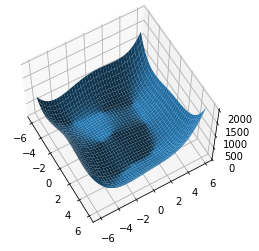

In [21]:
fig = plt.figure('himmelblau')
ax = fig.gca(projection = '3d')
ax.plot_surface(X,Y,Z)
ax.view_init(60,-30)
plt.show()

In [30]:
#参数初始化 
x = tf.constant([4.,0.0])
#超参
lr = 0.01
for step in range(200):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = himmelblau(x)
        grads = tape.gradient(y,x)
    x = x - lr * grads
    x
    if step % 20 ==0:
        print('step {}: x={} , f(x):{}'.format(step,x,y))

    

step 0: x=[ 3.26       -0.09999999] , f(x):34.0
step 20: x=[ 3.5467901 -1.4388103] , f(x):2.747403621673584
step 40: x=[ 3.5843565 -1.8473402] , f(x):1.7569736883160658e-05
step 60: x=[ 3.584428  -1.8481257] , f(x):2.273736580959973e-11
step 80: x=[ 3.5844283 -1.8481264] , f(x):1.818989620386291e-12
step 100: x=[ 3.5844283 -1.8481264] , f(x):1.818989620386291e-12
step 120: x=[ 3.5844283 -1.8481264] , f(x):1.818989620386291e-12
step 140: x=[ 3.5844283 -1.8481264] , f(x):1.818989620386291e-12
step 160: x=[ 3.5844283 -1.8481264] , f(x):1.818989620386291e-12
step 180: x=[ 3.5844283 -1.8481264] , f(x):1.818989620386291e-12
